# Datathon Baseline EDA
### Team : Strong Watchmen
---
#### Createed Time : 2022-11-16 (수) 11:00AM
#### Version 1
---
#### Last Modified Time : -
#### Version : -

* 목차
1. 데이타 불러오기
2. 데이타 살펴보기
3. 데이타의 이해 : 시각화
4. 데이타 전처리
5. 데이타 분리 : 훈련세트, 시험세트
6. 모델 작성
7. 모델 훈련 : 훈련세트
8. 모델 예측 : 시험세트
- 참고자료

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

import seaborn as sns  
from matplotlib import pyplot as plt

# 손정기 작성

In [3]:
atheletes = pd.read_csv('.\\data\\athlete_events.csv')
noc_country = pd.read_csv('.\\data\\noc_regions.csv')
w_gdp = pd.read_csv('.\\data\\world_gdp.csv')
w_pop = pd.read_csv('.\\data\\world_pop.csv')

In [4]:
noc_country.drop('notes', axis = 1 , inplace = True)
noc_country.rename(columns = {'region':'Country'}, inplace = True)

### 나라 이름 및 국가 코드 통일

In [5]:
olympics_merge = atheletes.merge(noc_country,
                                left_on = 'NOC',
                                right_on = 'NOC',
                                how = 'left')

In [6]:
olympics_merge

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland


In [7]:
olympics_merge.loc[olympics_merge['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


In [8]:
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='SGP', 'Singapore', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='ROT', 'Refugee Olympic Athletes', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='UNK', 'Unknown', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='TUV', 'Tuvalu', olympics_merge['Country'])

In [9]:
olympics_merge.drop('Team', axis = 1, inplace = True)

In [10]:
print(olympics_merge.isnull().sum())

ID              0
Name            0
Sex             0
Age          9474
Height      60171
Weight      62875
NOC             0
Games           0
Year            0
Season          0
City            0
Sport           0
Event           0
Medal      231333
Country         0
dtype: int64


In [11]:
w_gdp = w_gdp.rename(columns=w_gdp.iloc[2])
w_gdp.drop([0, 1, 2], axis=0, inplace = True)
w_gdp.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)
w_gdp = pd.melt(w_gdp, id_vars = ['Country Name', 'Country Code'], var_name = 'Year', value_name = 'GDP')
w_gdp['Year'] = pd.to_numeric(w_gdp['Year'], downcast='integer')
w_gdp

,Country Name,Country Code,Year,GDP
0,Afghanistan,AFG,1960,5.377778e+08
1,Albania,ALB,1960,NaN
2,Algeria,DZA,1960,2.723649e+09
3,American Samoa,ASM,1960,NaN
4,Andorra,AND,1960,NaN
...,...,...,...,...
12478,"Virgin Islands, US",VIR,2016,NaN
12479,Palestine,PSE,2016,1.339710e+10
12480,Yemen,YEM,2016,2.731761e+10
12481,Zambia,ZMB,2016,2.106399e+10


In [12]:
nation_list = list(set(olympics_merge['Country'].unique()) - set(w_gdp['Country Name'].unique()))
print(len(nation_list))
print(nation_list)

6
['Taiwan', 'Refugee Olympic Athletes', 'Boliva', 'Individual Olympic Athletes', 'Unknown', 'Cook Islands']


In [13]:
# Merge to get country code
olympics_merge_code = olympics_merge.merge(w_gdp[['Country Name', 'Country Code']].drop_duplicates(),
                                            left_on = 'Country',
                                            right_on = 'Country Name',
                                            how = 'left')

olympics_merge_code.drop('Country Name', axis = 1, inplace = True)
olympics_merge_copy = olympics_merge_code.copy()

olympics_merge_code

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Country Code
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,CHN
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,CHN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,DNK
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,DNK
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,POL
271112,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,POL
271113,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,POL
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,POL


In [14]:
olympics_merge_code.head(15)

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Country Code
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,CHN
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,CHN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,DNK
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,DNK
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NLD
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NLD
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NLD
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NLD
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NLD
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NLD


In [15]:
print(olympics_merge_code.isnull().sum())

ID                   0
Name                 0
Sex                  0
Age               9474
Height           60171
Weight           62875
NOC                  0
Games                0
Year                 0
Season               0
City                 0
Sport                0
Event                0
Medal           231333
Country              0
Country Code      1397
dtype: int64


In [16]:
print(len(olympics_merge_code.loc[olympics_merge_code['Country Code'].isnull(),['NOC', 'Country']].drop_duplicates()))

olympics_merge_code.loc[olympics_merge_code['Country Code'].isnull(),['NOC', 'Country', 'Country Code']].drop_duplicates()

6


,NOC,Country,Country Code
3165,IOA,Individual Olympic Athletes,NaN
6267,ROT,Refugee Olympic Athletes,NaN
8143,BOL,Boliva,NaN
12572,TPE,Taiwan,NaN
17436,COK,Cook Islands,NaN
61080,UNK,Unknown,NaN


In [17]:
olympics_merge_code.loc[olympics_merge_code['Country'] == 'Russia',['NOC', 'Country', 'Country Code']].drop_duplicates()

,NOC,Country,Country Code
163,RUS,Russia,RUS
192,URS,Russia,RUS
620,EUN,Russia,RUS


In [18]:
olympics_merge_code.loc[olympics_merge_code['Country'] == 'Germany',['NOC', 'Country', 'Country Code']].drop_duplicates()

,NOC,Country,Country Code
261,GER,Germany,DEU
674,FRG,Germany,DEU
676,GDR,Germany,DEU
8155,SAA,Germany,DEU


In [19]:
olympics_merge_code['Country Code'].fillna(olympics_merge_code['NOC'], inplace = True)

In [20]:
print(len(olympics_merge_code.loc[olympics_merge_code['Country Code'].isnull(),['NOC', 'Country']].drop_duplicates()))

olympics_merge_code.loc[olympics_merge_code['Country Code'].isnull(),['NOC', 'Country', 'Country Code']].drop_duplicates()

0


,NOC,Country,Country Code


In [21]:
olympics_merge_code.loc[olympics_merge_code['NOC'] != olympics_merge_code['Country Code']]

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Country Code
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,DNK
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,DNK
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NLD
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NLD
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271079,135553,Galina Ivanovna Zybina (-Fyodorova),F,29.0,168.0,80.0,URS,1960 Summer,1960,Summer,Roma,Athletics,Athletics Women's Shot Put,NaN,Russia,RUS
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,RUS
271099,135560,Stavroula Zygouri,F,36.0,171.0,63.0,GRE,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",NaN,Greece,GRC
271100,135561,Frantiek Zyka,M,26.0,NaN,NaN,TCH,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's Marathon,NaN,Czech Republic,CZE


### GDP데이터 및 Population 데이터 결합

In [22]:
olympics_merge_gdp = olympics_merge_code.merge(w_gdp,
                                                left_on = ['Country Code', 'Year'],
                                                right_on = ['Country Code', 'Year'],
                                                how = 'left')

olympics_merge_gdp

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Country Code,Country Name,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,CHN,China,4.269160e+11
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,CHN,China,8.560550e+12
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,DNK,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,DNK,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NLD,Netherlands,2.585680e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,POL,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,POL,Poland,5.450760e+11
271113,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,POL,Poland,5.450760e+11
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,POL,Poland,1.743880e+11


In [23]:
olympics_merge_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            271116 non-null  int64  
 1   Name          271116 non-null  object 
 2   Sex           271116 non-null  object 
 3   Age           261642 non-null  float64
 4   Height        210945 non-null  float64
 5   Weight        208241 non-null  float64
 6   NOC           271116 non-null  object 
 7   Games         271116 non-null  object 
 8   Year          271116 non-null  int64  
 9   Season        271116 non-null  object 
 10  City          271116 non-null  object 
 11  Sport         271116 non-null  object 
 12  Event         271116 non-null  object 
 13  Medal         39783 non-null   object 
 14  Country       271116 non-null  object 
 15  Country Code  271116 non-null  object 
 16  Country Name  207852 non-null  object 
 17  GDP           184339 non-null  float64
dtypes: f

In [24]:
w_pop.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281


In [25]:
w_pop.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)
w_pop = pd.melt(w_pop, id_vars = ['Country', 'Country Code'], var_name = 'Year', value_name = 'Population')
w_pop['Year'] = pd.to_numeric(w_pop['Year'])
w_pop.rename(columns = {'Country' : 'Country Name'}, inplace=True)
w_pop.head()

,Country Name,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0


In [26]:
olympics_gdp_pop = olympics_merge_gdp.merge(w_pop, 
                                                  left_on = ['Country Code', 'Year'], 
                                                  right_on = ['Country Code', 'Year'], 
                                                  how = 'left')

olympics_gdp_pop.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Country Code,Country Name_x,GDP,Country Name_y,Population
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,CHN,China,4.269160e+11,China,1.164970e+09
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,CHN,China,8.560550e+12,China,1.350695e+09
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,DNK,NaN,NaN,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,DNK,NaN,NaN,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NLD,Netherlands,2.585680e+11,Netherlands,1.476009e+07


In [27]:
olympics_gdp_pop.drop(['Country Name_x', 'Country Name_y'], axis = 1, inplace = True)

olympics_gdp_pop.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Country Code,GDP,Population
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,CHN,4.269160e+11,1.164970e+09
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,CHN,8.560550e+12,1.350695e+09
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,DNK,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,DNK,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NLD,2.585680e+11,1.476009e+07


### 데이터 결측 처리

In [28]:
olympics_gdp_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            271116 non-null  int64  
 1   Name          271116 non-null  object 
 2   Sex           271116 non-null  object 
 3   Age           261642 non-null  float64
 4   Height        210945 non-null  float64
 5   Weight        208241 non-null  float64
 6   NOC           271116 non-null  object 
 7   Games         271116 non-null  object 
 8   Year          271116 non-null  int64  
 9   Season        271116 non-null  object 
 10  City          271116 non-null  object 
 11  Sport         271116 non-null  object 
 12  Event         271116 non-null  object 
 13  Medal         39783 non-null   object 
 14  Country       271116 non-null  object 
 15  Country Code  271116 non-null  object 
 16  GDP           184339 non-null  float64
 17  Population    206144 non-null  float64
dtypes: f

1. age, height, weight 는 데이터가 없는 경우가 있고
2. GDP와 Population의 경우 원 GDP, Population데이터가 1960년 부터 있기 때문에 1960년 이후 진행한 올림픽데이터는 삭제한다. 
3. 그리고도 없는 GDP, Population 데이터는 두 자료가 대부분 커진다는 가정하에, 각 나라별 가장 작은 데이터로 채운다

In [29]:
olympics_gdp_pop.drop(index = olympics_gdp_pop[olympics_gdp_pop['Year'] < 1960].index, inplace=True)

In [30]:
olympics_gdp_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209072 entries, 0 to 271115
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            209072 non-null  int64  
 1   Name          209072 non-null  object 
 2   Sex           209072 non-null  object 
 3   Age           207957 non-null  float64
 4   Height        197953 non-null  float64
 5   Weight        197248 non-null  float64
 6   NOC           209072 non-null  object 
 7   Games         209072 non-null  object 
 8   Year          209072 non-null  int64  
 9   Season        209072 non-null  object 
 10  City          209072 non-null  object 
 11  Sport         209072 non-null  object 
 12  Event         209072 non-null  object 
 13  Medal         28400 non-null   object 
 14  Country       209072 non-null  object 
 15  Country Code  209072 non-null  object 
 16  GDP           184339 non-null  float64
 17  Population    206144 non-null  float64
dtypes: f

In [31]:
olympics_gdp_pop['GDP'].fillna(olympics_gdp_pop.groupby([olympics_gdp_pop['Country Code']])['GDP'].transform(lambda x: x.fillna(x.min())), inplace=True)

In [32]:
olympics_gdp_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209072 entries, 0 to 271115
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            209072 non-null  int64  
 1   Name          209072 non-null  object 
 2   Sex           209072 non-null  object 
 3   Age           207957 non-null  float64
 4   Height        197953 non-null  float64
 5   Weight        197248 non-null  float64
 6   NOC           209072 non-null  object 
 7   Games         209072 non-null  object 
 8   Year          209072 non-null  int64  
 9   Season        209072 non-null  object 
 10  City          209072 non-null  object 
 11  Sport         209072 non-null  object 
 12  Event         209072 non-null  object 
 13  Medal         28400 non-null   object 
 14  Country       209072 non-null  object 
 15  Country Code  209072 non-null  object 
 16  GDP           206929 non-null  float64
 17  Population    206144 non-null  float64
dtypes: f

In [33]:
olympics_gdp_pop['Population'].fillna(olympics_gdp_pop.groupby([olympics_gdp_pop['Country Code']])['Population'].transform(lambda x: x.fillna(x.min())), inplace=True)

In [34]:
olympics_gdp_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209072 entries, 0 to 271115
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            209072 non-null  int64  
 1   Name          209072 non-null  object 
 2   Sex           209072 non-null  object 
 3   Age           207957 non-null  float64
 4   Height        197953 non-null  float64
 5   Weight        197248 non-null  float64
 6   NOC           209072 non-null  object 
 7   Games         209072 non-null  object 
 8   Year          209072 non-null  int64  
 9   Season        209072 non-null  object 
 10  City          209072 non-null  object 
 11  Sport         209072 non-null  object 
 12  Event         209072 non-null  object 
 13  Medal         28400 non-null   object 
 14  Country       209072 non-null  object 
 15  Country Code  209072 non-null  object 
 16  GDP           206929 non-null  float64
 17  Population    207806 non-null  float64
dtypes: f

In [35]:
olympics_gdp_pop[olympics_gdp_pop['GDP'].isnull()]

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Country Code,GDP,Population
1858,1021,"Eduardo ""Bto"" Adriana",M,35.0,176.0,120.0,AHO,1960 Summer,1960,Summer,Roma,Weightlifting,Weightlifting Men's Heavyweight,NaN,Curacao,CUW,NaN,124826.0
1859,1021,"Eduardo ""Bto"" Adriana",M,47.0,176.0,120.0,AHO,1972 Summer,1972,Summer,Munich,Shooting,"Shooting Mixed Small-Bore Rifle, Prone, 50 metres",NaN,Curacao,CUW,NaN,147710.0
3165,1773,Ahmad Al-Afasi,M,33.0,NaN,NaN,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Double Trap,NaN,Individual Olympic Athletes,IOA,NaN,NaN
3306,1858,Fehaid Al-Deehani,M,49.0,178.0,95.0,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Double Trap,Gold,Individual Olympic Athletes,IOA,NaN,NaN
3369,1897,Abdulrahman Al-Faihan,M,30.0,NaN,NaN,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Trap,NaN,Individual Olympic Athletes,IOA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266819,133490,Yun Song-Mi,F,20.0,166.0,62.0,PRK,2012 Summer,2012,Summer,London,Football,Football Women's Football,NaN,North Korea,PRK,NaN,24854034.0
266822,133493,Yun Won-Chol,M,23.0,163.0,59.0,PRK,2012 Summer,2012,Summer,London,Wrestling,"Wrestling Men's Featherweight, Greco-Roman",NaN,North Korea,PRK,NaN,24854034.0
266823,133493,Yun Won-Chol,M,27.0,163.0,59.0,PRK,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Featherweight, Greco-Roman",NaN,North Korea,PRK,NaN,25368620.0
266829,133497,Yun Yong-Chol,M,24.0,167.0,60.0,PRK,1992 Summer,1992,Summer,Barcelona,Boxing,Boxing Men's Lightweight,NaN,North Korea,PRK,NaN,20937404.0


In [36]:
olympics_gdp_pop[olympics_gdp_pop['Population'].isnull()]

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Country Code,GDP,Population
298,160,Ali Abdalla Afringi,M,25.0,163.0,57.0,ERI,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Men's 5,000 metres",NaN,Eritrea,ERI,1.380189e+09,NaN
1647,915,Abrar Osman Adem,M,18.0,168.0,58.0,ERI,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 5,000 metres",NaN,Eritrea,ERI,7.063708e+08,NaN
1648,915,Abrar Osman Adem,M,22.0,168.0,58.0,ERI,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 5,000 metres",NaN,Eritrea,ERI,7.063708e+08,NaN
3165,1773,Ahmad Al-Afasi,M,33.0,NaN,NaN,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Double Trap,NaN,Individual Olympic Athletes,IOA,NaN,NaN
3306,1858,Fehaid Al-Deehani,M,49.0,178.0,95.0,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Double Trap,Gold,Individual Olympic Athletes,IOA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266664,133400,Yuan Shu-Chi,F,19.0,168.0,62.0,TPE,2004 Summer,2004,Summer,Athina,Archery,Archery Women's Individual,NaN,Taiwan,TPE,NaN,NaN
266665,133400,Yuan Shu-Chi,F,19.0,168.0,62.0,TPE,2004 Summer,2004,Summer,Athina,Archery,Archery Women's Team,Bronze,Taiwan,TPE,NaN,NaN
266666,133400,Yuan Shu-Chi,F,23.0,168.0,62.0,TPE,2008 Summer,2008,Summer,Beijing,Archery,Archery Women's Individual,NaN,Taiwan,TPE,NaN,NaN
266667,133400,Yuan Shu-Chi,F,23.0,168.0,62.0,TPE,2008 Summer,2008,Summer,Beijing,Archery,Archery Women's Team,NaN,Taiwan,TPE,NaN,NaN


In [37]:
olympics_gdp_pop = olympics_gdp_pop.dropna(subset=['GDP', 'Population'], how='any', axis=0)
olympics_gdp_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206886 entries, 0 to 271115
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            206886 non-null  int64  
 1   Name          206886 non-null  object 
 2   Sex           206886 non-null  object 
 3   Age           205775 non-null  float64
 4   Height        196012 non-null  float64
 5   Weight        195297 non-null  float64
 6   NOC           206886 non-null  object 
 7   Games         206886 non-null  object 
 8   Year          206886 non-null  int64  
 9   Season        206886 non-null  object 
 10  City          206886 non-null  object 
 11  Sport         206886 non-null  object 
 12  Event         206886 non-null  object 
 13  Medal         28277 non-null   object 
 14  Country       206886 non-null  object 
 15  Country Code  206886 non-null  object 
 16  GDP           206886 non-null  float64
 17  Population    206886 non-null  float64
dtypes: f

In [38]:
olympics_gdp_pop.isnull().sum()

ID                   0
Name                 0
Sex                  0
Age               1111
Height           10874
Weight           11589
NOC                  0
Games                0
Year                 0
Season               0
City                 0
Sport                0
Event                0
Medal           178609
Country              0
Country Code         0
GDP                  0
Population           0
dtype: int64

In [39]:
merged = olympics_gdp_pop.copy()

In [40]:
merged['Age'].fillna(merged.groupby([merged['Country Code'], merged['Year'], merged['Season'], merged['Sport']])['Age'].transform(lambda x: x.fillna(x.median())), inplace=True)
merged['Height'].fillna(merged.groupby([merged['Country Code'], merged['Year'], merged['Season'], merged['Sport']])['Height'].transform(lambda x: x.fillna(x.median())), inplace=True)
merged['Weight'].fillna(merged.groupby([merged['Country Code'], merged['Year'], merged['Season'], merged['Sport']])['Weight'].transform(lambda x: x.fillna(x.median())), inplace=True)

In [41]:
merged.isnull().sum()

ID                   0
Name                 0
Sex                  0
Age                343
Height            3119
Weight            3115
NOC                  0
Games                0
Year                 0
Season               0
City                 0
Sport                0
Event                0
Medal           178609
Country              0
Country Code         0
GDP                  0
Population           0
dtype: int64

In [42]:
merged['Age'].fillna(merged.groupby([merged['Country Code'], merged['Season']])['Age'].transform(lambda x: x.fillna(x.median())), inplace=True)
merged['Height'].fillna(merged.groupby([merged['Country Code'], merged['Season']])['Height'].transform(lambda x: x.fillna(x.median())), inplace=True)
merged['Weight'].fillna(merged.groupby([merged['Country Code'], merged['Season']])['Weight'].transform(lambda x: x.fillna(x.median())), inplace=True)

In [43]:
merged.isnull().sum()

ID                   0
Name                 0
Sex                  0
Age                  0
Height              25
Weight              22
NOC                  0
Games                0
Year                 0
Season               0
City                 0
Sport                0
Event                0
Medal           178609
Country              0
Country Code         0
GDP                  0
Population           0
dtype: int64

In [44]:
# NaN 데이타 처리
merged['Medal'].fillna('No', inplace=True) # Nan을 'No'로 대체

# 마지막으로 남은 결측치 행 삭제
merged = merged.dropna(subset=['Age', 'Height', 'Weight'], how='any', axis=0)

In [45]:
merged.drop(['ID'], axis=1, inplace=True)
merged.drop(['Name'], axis=1, inplace=True)
merged.drop(['NOC'], axis=1, inplace=True)
merged.drop(['Games'], axis=1, inplace=True)
merged.drop(['Country'], axis=1, inplace=True)

In [46]:
merged

,Sex,Age,Height,Weight,Year,Season,City,Sport,Event,Medal,Country Code,GDP,Population
0,M,24.0,180.0,80.0,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No,CHN,4.269160e+11,1.164970e+09
1,M,23.0,170.0,60.0,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No,CHN,8.560550e+12,1.350695e+09
4,F,21.0,185.0,82.0,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No,NLD,2.585680e+11,1.476009e+07
5,F,21.0,185.0,82.0,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No,NLD,2.585680e+11,1.476009e+07
6,F,25.0,185.0,82.0,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No,NLD,3.583300e+11,1.518417e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No,POL,9.433705e+10,3.435630e+07
271112,M,27.0,176.0,59.0,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No,POL,5.450760e+11,3.801174e+07
271113,M,27.0,176.0,59.0,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No,POL,5.450760e+11,3.801174e+07
271114,M,30.0,185.0,96.0,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No,POL,1.743880e+11,3.866348e+07


In [47]:
merged.isnull().sum()

Sex             0
Age             0
Height          0
Weight          0
Year            0
Season          0
City            0
Sport           0
Event           0
Medal           0
Country Code    0
GDP             0
Population      0
dtype: int64

### 데이터 정규화
- GDP 데이터와 Population 데이터는 단위가 매우 크기때문에 정규화 시킨다. 

In [48]:
merged.reset_index(inplace=True)
merged

,index,Sex,Age,Height,Weight,Year,Season,City,Sport,Event,Medal,Country Code,GDP,Population
0,0,M,24.0,180.0,80.0,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No,CHN,4.269160e+11,1.164970e+09
1,1,M,23.0,170.0,60.0,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No,CHN,8.560550e+12,1.350695e+09
2,4,F,21.0,185.0,82.0,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No,NLD,2.585680e+11,1.476009e+07
3,5,F,21.0,185.0,82.0,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No,NLD,2.585680e+11,1.476009e+07
4,6,F,25.0,185.0,82.0,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No,NLD,3.583300e+11,1.518417e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206856,271111,M,29.0,179.0,89.0,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No,POL,9.433705e+10,3.435630e+07
206857,271112,M,27.0,176.0,59.0,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No,POL,5.450760e+11,3.801174e+07
206858,271113,M,27.0,176.0,59.0,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No,POL,5.450760e+11,3.801174e+07
206859,271114,M,30.0,185.0,96.0,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No,POL,1.743880e+11,3.866348e+07


In [49]:
final_df = merged.copy()
gp = merged[['GDP', 'Population']].values
merged.drop(['GDP', 'Population'], axis=1, inplace=True)

merged

,index,Sex,Age,Height,Weight,Year,Season,City,Sport,Event,Medal,Country Code
0,0,M,24.0,180.0,80.0,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No,CHN
1,1,M,23.0,170.0,60.0,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No,CHN
2,4,F,21.0,185.0,82.0,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No,NLD
3,5,F,21.0,185.0,82.0,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No,NLD
4,6,F,25.0,185.0,82.0,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No,NLD
...,...,...,...,...,...,...,...,...,...,...,...,...
206856,271111,M,29.0,179.0,89.0,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No,POL
206857,271112,M,27.0,176.0,59.0,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No,POL
206858,271113,M,27.0,176.0,59.0,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No,POL
206859,271114,M,30.0,185.0,96.0,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No,POL


In [50]:
gp

array([[4.2691600e+11, 1.1649700e+09],
       [8.5605500e+12, 1.3506950e+09],
       [2.5856800e+11, 1.4760094e+07],
       ...,
       [5.4507600e+11, 3.8011735e+07],
       [1.7438800e+11, 3.8663481e+07],
       [1.9868100e+11, 3.8230364e+07]])

In [51]:
print(gp.shape)

(206861, 2)


In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

gp_scaled = gp
scaler.fit(gp_scaled)
gp_scaled = scaler.transform(gp_scaled)
gp_scaled

array([[0.02292069, 0.84499748],
       [0.45963831, 0.97971211],
       [0.01388161, 0.01069888],
       ...,
       [0.02926503, 0.02756433],
       [0.00936175, 0.02803707],
       [0.01066611, 0.02772291]])

In [53]:
print(gp_scaled.shape)

(206861, 2)


In [54]:
scaled_gp = pd.DataFrame(gp_scaled, columns = {'GDP', 'Population'})
scaled_gp

,GDP,Population
0,0.022921,0.844997
1,0.459638,0.979712
2,0.013882,0.010699
3,0.013882,0.010699
4,0.019238,0.011006
...,...,...
206856,0.005064,0.024913
206857,0.029265,0.027564
206858,0.029265,0.027564
206859,0.009362,0.028037


In [55]:
merged = pd.concat([merged, scaled_gp], axis=1)
merged

,index,Sex,Age,Height,Weight,Year,Season,City,Sport,Event,Medal,Country Code,GDP,Population
0,0,M,24.0,180.0,80.0,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No,CHN,0.022921,0.844997
1,1,M,23.0,170.0,60.0,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No,CHN,0.459638,0.979712
2,4,F,21.0,185.0,82.0,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No,NLD,0.013882,0.010699
3,5,F,21.0,185.0,82.0,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No,NLD,0.013882,0.010699
4,6,F,25.0,185.0,82.0,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No,NLD,0.019238,0.011006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206856,271111,M,29.0,179.0,89.0,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No,POL,0.005064,0.024913
206857,271112,M,27.0,176.0,59.0,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No,POL,0.029265,0.027564
206858,271113,M,27.0,176.0,59.0,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No,POL,0.029265,0.027564
206859,271114,M,30.0,185.0,96.0,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No,POL,0.009362,0.028037


In [56]:
merged.drop(['index'], axis=1, inplace=True)

In [57]:
merged_copy = merged.copy()
merged_copy

,Sex,Age,Height,Weight,Year,Season,City,Sport,Event,Medal,Country Code,GDP,Population
0,M,24.0,180.0,80.0,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No,CHN,0.022921,0.844997
1,M,23.0,170.0,60.0,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No,CHN,0.459638,0.979712
2,F,21.0,185.0,82.0,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No,NLD,0.013882,0.010699
3,F,21.0,185.0,82.0,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No,NLD,0.013882,0.010699
4,F,25.0,185.0,82.0,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No,NLD,0.019238,0.011006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206856,M,29.0,179.0,89.0,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No,POL,0.005064,0.024913
206857,M,27.0,176.0,59.0,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No,POL,0.029265,0.027564
206858,M,27.0,176.0,59.0,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No,POL,0.029265,0.027564
206859,M,30.0,185.0,96.0,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No,POL,0.009362,0.028037


### Train 데이터 생성

- dummy 변환

In [58]:
# Dummy transform
merged = pd.get_dummies(merged, columns = ['Sex', 'Season', 'City', 'Sport', 'Event', 'Country Code'])

# Label Encoding
merged['Label'] = merged['Medal'].replace('No',0).replace('Gold',1).replace('Silver', 2).replace('Bronze', 3)
merged.drop(['Medal'], axis=1, inplace=True)

In [59]:
merged.isnull().sum()

Age                 0
Height              0
Weight              0
Year                0
GDP                 0
                   ..
Country Code_YEM    0
Country Code_ZAF    0
Country Code_ZMB    0
Country Code_ZWE    0
Label               0
Length: 779, dtype: int64

In [60]:
merged

,Age,Height,Weight,Year,GDP,Population,Sex_F,Sex_M,Season_Summer,Season_Winter,...,Country Code_VIR,Country Code_VNM,Country Code_VUT,Country Code_WSM,Country Code_XKX,Country Code_YEM,Country Code_ZAF,Country Code_ZMB,Country Code_ZWE,Label
0,24.0,180.0,80.0,1992,0.022921,0.844997,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,23.0,170.0,60.0,2012,0.459638,0.979712,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,21.0,185.0,82.0,1988,0.013882,0.010699,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,21.0,185.0,82.0,1988,0.013882,0.010699,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,25.0,185.0,82.0,1992,0.019238,0.011006,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206856,29.0,179.0,89.0,1976,0.005064,0.024913,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
206857,27.0,176.0,59.0,2014,0.029265,0.027564,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
206858,27.0,176.0,59.0,2014,0.029265,0.027564,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
206859,30.0,185.0,96.0,1998,0.009362,0.028037,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


- 레이블 생성

In [61]:
# Medal 칼럼은 레이블로 분리
labels = merged['Label']
merged.drop(['Label'], axis=1, inplace=True)

In [62]:
merged.isnull().sum()

Age                 0
Height              0
Weight              0
Year                0
GDP                 0
                   ..
Country Code_XKX    0
Country Code_YEM    0
Country Code_ZAF    0
Country Code_ZMB    0
Country Code_ZWE    0
Length: 778, dtype: int64

In [63]:
labels.isnull().sum()

0

### 데이터 세트 분리

In [64]:
TEST_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(merged, 
                                                    labels, 
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE) 

In [65]:
print('train set :', X_train.shape)
print('test set :', X_test.shape)

train set : (165488, 778)
test set : (41373, 778)


### 훈련 및 평가

In [66]:
def printDoubleLine(title: str) -> None:
    print('========================================================')
    print('[', title, ']')

def printLine(title: str = None) -> None:
    print('--------------------------------------------------------')
    if title is not None:
        print('[', title, ']')
    return

[ Decision Tree ]
estimator type : classifier
Accuracy : 0.8928528267227419
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     35694
           1       0.59      0.60      0.59      1880
           2       0.55      0.59      0.57      1825
           3       0.55      0.52      0.53      1974

    accuracy                           0.89     41373
   macro avg       0.66      0.66      0.66     41373
weighted avg       0.89      0.89      0.89     41373



Text(0.5, 1.0, 'Decion Tree (F1 Score : 0.893)')

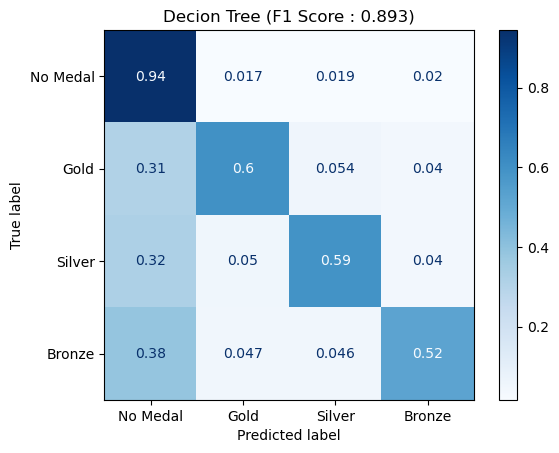

In [67]:
label_names=['No Medal', 'Gold', 'Silver', 'Bronze']
printDoubleLine('Decision Tree')
decision_tree = DecisionTreeClassifier(random_state=RANDOM_STATE) 
print('estimator type :', decision_tree._estimator_type)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)
print(classification_report(y_test, y_pred))
plot = plot_confusion_matrix(decision_tree, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label_names, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true', 'pred', 'all' 중에서 지정 가능. default=None
f1score = f1_score(y_test, y_pred, average='weighted')
plot.ax_.set_title('Decion Tree (F1 Score : ' + str(round(f1score, 3)) + ')')

--------------------------------------------------------
[ Random Forest ]
estimator type : classifier
Accuracy : 0.9223889976554758
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     35694
           1       0.87      0.51      0.64      1880
           2       0.90      0.48      0.63      1825
           3       0.92      0.41      0.56      1974

    accuracy                           0.92     41373
   macro avg       0.90      0.60      0.70     41373
weighted avg       0.92      0.92      0.91     41373



Text(0.5, 1.0, 'Random Forest (F1 Score : 0.911)')

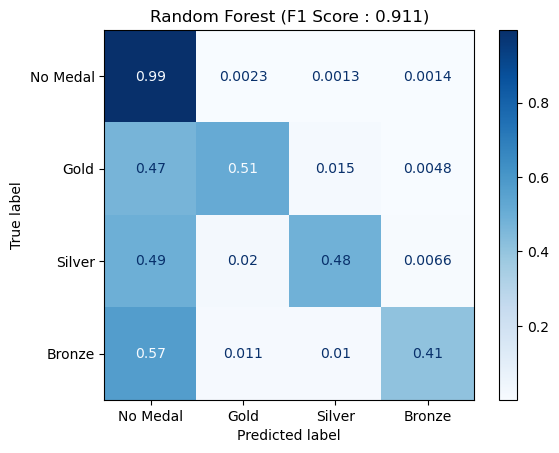

In [68]:
# Random Forest Classifier

label_names=['No Medal', 'Gold', 'Silver', 'Bronze']
printLine('Random Forest')
random_forest = RandomForestClassifier(random_state=RANDOM_STATE)
print('estimator type :', random_forest._estimator_type)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)
print(classification_report(y_test, y_pred)) 
plot = plot_confusion_matrix(random_forest, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label_names, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true', 'pred', 'all' 중에서 지정 가능. default=None
f1score = f1_score(y_test, y_pred, average='weighted')
plot.ax_.set_title('Random Forest (F1 Score : ' + str(round(f1score, 3)) + ')')

### 상혁님이 시도한 Data augmentation을 시도해서 다시 모델 훈련을 시도한다. 

In [69]:
merged = merged_copy
merged

,Sex,Age,Height,Weight,Year,Season,City,Sport,Event,Medal,Country Code,GDP,Population
0,M,24.0,180.0,80.0,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No,CHN,0.022921,0.844997
1,M,23.0,170.0,60.0,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No,CHN,0.459638,0.979712
2,F,21.0,185.0,82.0,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No,NLD,0.013882,0.010699
3,F,21.0,185.0,82.0,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No,NLD,0.013882,0.010699
4,F,25.0,185.0,82.0,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No,NLD,0.019238,0.011006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206856,M,29.0,179.0,89.0,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No,POL,0.005064,0.024913
206857,M,27.0,176.0,59.0,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No,POL,0.029265,0.027564
206858,M,27.0,176.0,59.0,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No,POL,0.029265,0.027564
206859,M,30.0,185.0,96.0,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No,POL,0.009362,0.028037


In [70]:
merged_gold_multiple = pd.DataFrame()

for i in range(17):
    merged_gold = merged[merged['Medal'] == 'Gold']
    noise = 2 * np.random.normal(size=len(merged_gold))
    merged_gold['Age'] = merged_gold['Age'] + noise

    noise = 2 * np.random.normal(size=len(merged_gold))
    merged_gold['Height'] = merged_gold['Height'] + noise

    noise = 2 * np.random.normal(size=len(merged_gold))
    merged_gold['Weight'] = merged_gold['Weight'] + noise
    merged_gold_multiple = pd.concat([merged_gold_multiple, merged_gold])
    
print(merged_gold_multiple.shape)

(159732, 13)


In [71]:
merged_silver_multiple = pd.DataFrame()

for i in range(17):
    merged_silver = merged[merged['Medal'] == 'Silver'] 
    noise = 2 * np.random.normal(size=len(merged_silver))
    merged_silver['Age'] = merged_silver['Age'] + noise

    noise = 2 * np.random.normal(size=len(merged_silver))
    merged_silver['Height'] = merged_silver['Height'] + noise

    noise = 2 * np.random.normal(size=len(merged_silver))
    merged_silver['Weight'] = merged_silver['Weight'] + noise
    
    merged_silver_multiple = pd.concat([merged_silver_multiple, merged_silver])
    
print(merged_silver_multiple.shape)    

(157216, 13)


In [72]:
merged_bronze_multiple = pd.DataFrame()

for i in range(17):
    merged_bronze = merged[merged['Medal'] == 'Bronze'] 
    noise = 2 * np.random.normal(size=len(merged_bronze))
    merged_bronze['Age'] = merged_bronze['Age'] + noise

    noise = 2 * np.random.normal(size=len(merged_bronze))
    merged_bronze['Height'] = merged_bronze['Height'] + noise

    noise = 2 * np.random.normal(size=len(merged_bronze))
    merged_bronze['Weight'] = merged_bronze['Weight'] + noise
    
    merged_bronze_multiple = pd.concat([merged_bronze_multiple, merged_bronze])
    
print(merged_bronze_multiple.shape)

(163761, 13)


In [73]:
print(merged.shape)

(206861, 13)


In [74]:
merged = pd.concat([merged, merged_gold_multiple, merged_silver_multiple, merged_bronze_multiple])
print(merged.shape)

(687570, 13)


In [75]:
# Dummy transform
merged = pd.get_dummies(merged, columns = ['Sex', 'Season', 'City', 'Sport', 'Event', 'Country Code'])

# Label Encoding
merged['Label'] = merged['Medal'].replace('No',0).replace('Gold',1).replace('Silver', 2).replace('Bronze', 3)
merged.drop(['Medal'], axis=1, inplace=True)

In [76]:
# Medal 칼럼은 레이블로 분리
labels = merged['Label']
merged.drop(['Label'], axis=1, inplace=True)

In [77]:
# Data set 분리
TEST_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(merged, 
                                                    labels, 
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE) 

In [78]:
print('train set :', X_train.shape)
print('test set :', X_test.shape)
print('train label :', y_train.shape)
print('test label :', y_test.shape)

train set : (550056, 778)
test set : (137514, 778)
train label : (550056,)
test label : (137514,)


[ Decision Tree ]
estimator type : classifier
Accuracy : 0.936195587358378
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     35657
           1       0.94      0.95      0.94     33871
           2       0.93      0.95      0.94     33097
           3       0.93      0.94      0.94     34889

    accuracy                           0.94    137514
   macro avg       0.94      0.94      0.94    137514
weighted avg       0.94      0.94      0.94    137514



Text(0.5, 1.0, 'Decion Tree (F1 Score : 0.936)')

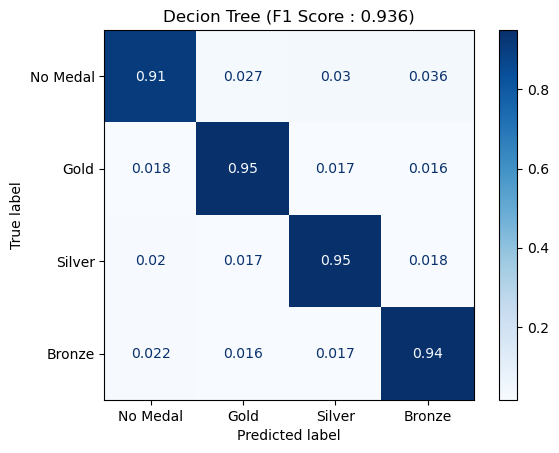

In [79]:
label_names=['No Medal', 'Gold', 'Silver', 'Bronze']
printDoubleLine('Decision Tree')
decision_tree = DecisionTreeClassifier(random_state=RANDOM_STATE) 
print('estimator type :', decision_tree._estimator_type)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)
print(classification_report(y_test, y_pred))
plot = plot_confusion_matrix(decision_tree, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label_names, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true', 'pred', 'all' 중에서 지정 가능. default=None
f1score = f1_score(y_test, y_pred, average='weighted')
plot.ax_.set_title('Decion Tree (F1 Score : ' + str(round(f1score, 3)) + ')')

In [80]:
merged = merged_copy
merged

,Sex,Age,Height,Weight,Year,Season,City,Sport,Event,Medal,Country Code,GDP,Population
0,M,24.0,180.0,80.0,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No,CHN,0.022921,0.844997
1,M,23.0,170.0,60.0,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No,CHN,0.459638,0.979712
2,F,21.0,185.0,82.0,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No,NLD,0.013882,0.010699
3,F,21.0,185.0,82.0,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No,NLD,0.013882,0.010699
4,F,25.0,185.0,82.0,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No,NLD,0.019238,0.011006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206856,M,29.0,179.0,89.0,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No,POL,0.005064,0.024913
206857,M,27.0,176.0,59.0,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No,POL,0.029265,0.027564
206858,M,27.0,176.0,59.0,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No,POL,0.029265,0.027564
206859,M,30.0,185.0,96.0,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No,POL,0.009362,0.028037


In [81]:
# Dummy transform
merged = pd.get_dummies(merged, columns = ['Sex', 'Season', 'City', 'Sport', 'Event', 'Country Code'])

# Label Encoding
merged['Label'] = merged['Medal'].replace('No',0).replace('Gold',1).replace('Silver', 2).replace('Bronze', 3)
merged.drop(['Medal'], axis=1, inplace=True)

In [82]:
# Medal 칼럼은 레이블로 분리
labels = merged['Label']
merged.drop(['Label'], axis=1, inplace=True)

In [83]:
# Data set 분리
TEST_SIZE = 0.3
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(merged, 
                                                    labels, 
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE) 

In [84]:
print('train set :', X_train.shape)
print('test set :', X_test.shape)

train set : (144802, 778)
test set : (62059, 778)


In [85]:
y_train

198613    0
152177    0
168717    3
198398    0
136165    0
         ..
119879    0
103694    0
131932    0
146867    0
121958    0
Name: Label, Length: 144802, dtype: int64

In [86]:
X_train

,Age,Height,Weight,Year,GDP,Population,Sex_F,Sex_M,Season_Summer,Season_Winter,...,Country Code_VEN,Country Code_VIR,Country Code_VNM,Country Code_VUT,Country Code_WSM,Country Code_XKX,Country Code_YEM,Country Code_ZAF,Country Code_ZMB,Country Code_ZWE
198613,20.0,155.0,52.0,2016,0.000753,0.002083,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
152177,26.0,178.0,77.0,2016,0.000770,0.002690,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
168717,29.0,174.0,60.0,1972,0.003784,0.420266,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
198398,19.0,175.0,61.0,1984,0.000415,0.000831,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
136165,22.0,178.5,73.0,1992,0.002644,0.025785,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,27.0,176.0,69.0,1972,0.000350,0.005112,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
103694,28.0,172.0,68.0,1964,0.002078,0.007333,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
131932,29.0,181.0,86.0,1988,0.000106,0.000014,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
146867,27.0,192.0,107.0,2016,0.096441,0.150613,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
merged = pd.concat([X_train, y_train], axis=1)
merged

,Age,Height,Weight,Year,GDP,Population,Sex_F,Sex_M,Season_Summer,Season_Winter,...,Country Code_VIR,Country Code_VNM,Country Code_VUT,Country Code_WSM,Country Code_XKX,Country Code_YEM,Country Code_ZAF,Country Code_ZMB,Country Code_ZWE,Label
198613,20.0,155.0,52.0,2016,0.000753,0.002083,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
152177,26.0,178.0,77.0,2016,0.000770,0.002690,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
168717,29.0,174.0,60.0,1972,0.003784,0.420266,0,1,1,0,...,0,0,0,0,0,0,0,0,0,3
198398,19.0,175.0,61.0,1984,0.000415,0.000831,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
136165,22.0,178.5,73.0,1992,0.002644,0.025785,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,27.0,176.0,69.0,1972,0.000350,0.005112,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
103694,28.0,172.0,68.0,1964,0.002078,0.007333,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
131932,29.0,181.0,86.0,1988,0.000106,0.000014,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
146867,27.0,192.0,107.0,2016,0.096441,0.150613,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
merged.dtypes

Age                 float64
Height              float64
Weight              float64
Year                  int64
GDP                 float64
                     ...   
Country Code_YEM      uint8
Country Code_ZAF      uint8
Country Code_ZMB      uint8
Country Code_ZWE      uint8
Label                 int64
Length: 779, dtype: object

In [89]:
merged_gold_multiple = pd.DataFrame()

for i in range(17):
    merged_gold = merged[merged['Label'] == 1]
    noise = 2 * np.random.normal(size=len(merged_gold))
    merged_gold['Age'] = merged_gold['Age'] + noise

    noise = 2 * np.random.normal(size=len(merged_gold))
    merged_gold['Height'] = merged_gold['Height'] + noise

    noise = 2 * np.random.normal(size=len(merged_gold))
    merged_gold['Weight'] = merged_gold['Weight'] + noise
    merged_gold_multiple = pd.concat([merged_gold_multiple, merged_gold])
    
print(merged_gold_multiple.shape)

(112234, 779)


In [90]:
merged_silver_multiple = pd.DataFrame()

for i in range(17):
    merged_silver = merged[merged['Label'] == 2] 
    noise = 2 * np.random.normal(size=len(merged_silver))
    merged_silver['Age'] = merged_silver['Age'] + noise

    noise = 2 * np.random.normal(size=len(merged_silver))
    merged_silver['Height'] = merged_silver['Height'] + noise

    noise = 2 * np.random.normal(size=len(merged_silver))
    merged_silver['Weight'] = merged_silver['Weight'] + noise
    
    merged_silver_multiple = pd.concat([merged_silver_multiple, merged_silver])
    
print(merged_silver_multiple.shape)

(110738, 779)


In [91]:
merged_bronze_multiple = pd.DataFrame()

for i in range(17):
    merged_bronze = merged[merged['Label'] == 3] 
    noise = 2 * np.random.normal(size=len(merged_bronze))
    merged_bronze['Age'] = merged_bronze['Age'] + noise

    noise = 2 * np.random.normal(size=len(merged_bronze))
    merged_bronze['Height'] = merged_bronze['Height'] + noise

    noise = 2 * np.random.normal(size=len(merged_bronze))
    merged_bronze['Weight'] = merged_bronze['Weight'] + noise
    
    merged_bronze_multiple = pd.concat([merged_bronze_multiple, merged_bronze])
    
print(merged_bronze_multiple.shape)

(113526, 779)


In [92]:
merged = pd.concat([merged, merged_gold_multiple, merged_silver_multiple, merged_bronze_multiple])
print(merged.shape)

(481300, 779)


In [93]:
y_train = merged['Label']

print(y_train.shape)

(481300,)


In [94]:
X_train = merged.drop(['Label'], axis=1)

In [95]:
print('train set :', X_train.shape)
print('test set :', X_test.shape)
print('train label :', y_train.shape)
print('test label :', y_test.shape)

train set : (481300, 778)
test set : (62059, 778)
train label : (481300,)
test label : (62059,)


[ Decision Tree ]
estimator type : classifier
Accuracy : 0.8658051209333054
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     53576
           1       0.51      0.58      0.54      2794
           2       0.44      0.54      0.49      2734
           3       0.43      0.53      0.47      2955

    accuracy                           0.87     62059
   macro avg       0.58      0.64      0.61     62059
weighted avg       0.88      0.87      0.87     62059



Text(0.5, 1.0, 'Decion Tree (F1 Score : 0.872)')

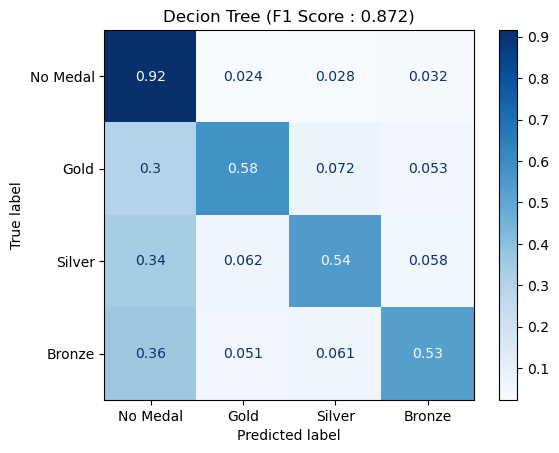

In [96]:
label_names=['No Medal', 'Gold', 'Silver', 'Bronze']
printDoubleLine('Decision Tree')
decision_tree = DecisionTreeClassifier(random_state=RANDOM_STATE) 
print('estimator type :', decision_tree._estimator_type)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)
print(classification_report(y_test, y_pred))
plot = plot_confusion_matrix(decision_tree, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label_names, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true', 'pred', 'all' 중에서 지정 가능. default=None
f1score = f1_score(y_test, y_pred, average='weighted')
plot.ax_.set_title('Decion Tree (F1 Score : ' + str(round(f1score, 3)) + ')')

--------------------------------------------------------
[ Random Forest ]
estimator type : classifier
Accuracy : 0.9110362719347718
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     53576
           1       0.65      0.61      0.63      2794
           2       0.65      0.58      0.61      2734
           3       0.65      0.54      0.59      2955

    accuracy                           0.91     62059
   macro avg       0.72      0.67      0.70     62059
weighted avg       0.91      0.91      0.91     62059



Text(0.5, 1.0, 'Random Forest (F1 Score : 0.908)')

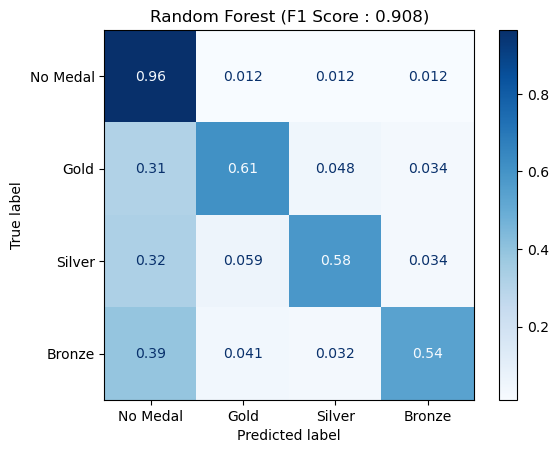

In [97]:
# Random Forest Classifier

label_names=['No Medal', 'Gold', 'Silver', 'Bronze']
printLine('Random Forest')
random_forest = RandomForestClassifier(random_state=RANDOM_STATE)
print('estimator type :', random_forest._estimator_type)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)
print(classification_report(y_test, y_pred)) 
plot = plot_confusion_matrix(random_forest, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label_names, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true', 'pred', 'all' 중에서 지정 가능. default=None
f1score = f1_score(y_test, y_pred, average='weighted')
plot.ax_.set_title('Random Forest (F1 Score : ' + str(round(f1score, 3)) + ')')